Question 1 (3 points)

Write Python code to build a neural network with the following details.

- Input data = Iris dataset

- Number of hidden layers = 1

- Number of units in hidden layer = 10

- Number of iterations = 5000

- Learning rate = 0.0001

- Learning algorithm = stochastic gradient descent

- Activation = logistic, tanh, relu

1. Compare the training score for each activation.

2. Plot the loss curve for each activation.

3. Report execution time for each activation as a bar graph. (Use library time and time() method)




We are going to develop Neural Network from scatch. Neural Network(NN) is the starting point of deep learning. We will implement a simple Neural Network with 1 hidden layer and 10 nodes.NN can be used in classification and regression tasks.
In this assignment, we will use the NN to perform a multiclass calssification problem.

In [280]:
# importing the pandas to read data and numpy for tensor multiplication and other operations.
import pandas as pd
import numpy as np


# DATASET:

For this problem of the building the neural network is the IRIS dataset. The Iris data set is a multiclass problem. We are given with sepal length,sepal width and petal length,petal width and variety of the flower.

The objective of the problem is given a sepal length,sepal length,petal length and petal width, we have to predict the variety of the flower.

In [281]:
data=pd.read_csv("/home/jyodeep/Practise_dump/Assignment_2_data/iris.csv")

Reading the data set using pandas from csv file 

In [282]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


We are viewing the dataset with the help pandas head method.As described in the dataset section, there are four features/attributes. They are our feature set and variety is our class. The four features are numerical features and the variety is a categorical feature. 
We will take the following steps:

1. First split the data into feature set and class variable 
2. Peform one hot encoding on the target variable
3. Column standadize the data using StandardScaler


In [283]:
# spliting the dataset into feature set i.e 
feature_set=data.iloc[:,:-1].values

In [284]:
feature_set.shape

(150, 4)

In [285]:
# spliting into labels or target variable 
labels=data.iloc[:,4]

In [286]:
# Shaping the labels
labels.shape

(150,)

In [287]:
# Shaping the labels
labels.shape

(150,)

In [288]:
#Checking the shape of the dataset 
data.shape

(150, 5)

In [289]:
# As mentioned,we are using standardScaler of sklearn to standardise the feature set
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

feature_set=scaler.fit_transform(feature_set)

   

The labels/target variables are categorical feature and we need to encode them to numerical features. There are multiple strategies (like label encoding, onehotencoding) can be taken. As our target varaible don't have any ordinal properties, we are going onehotencoding.

In [290]:
# checking the distribution of the class labels
labels.value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

We have equal distribution of classes. We don't have imbalance data set here.

In [291]:
# Checking few datapoints 
labels[10]

'Setosa'

In [292]:
print(type(labels))

<class 'pandas.core.series.Series'>


In [293]:
# checking few datatpoints 
labels[0]

'Setosa'

In [294]:
# Converting the datapoints into numerical for converting them into onehot encoded feature
labels=labels.map({'Versicolor':0,'Virginica':1,'Setosa':2})

In [295]:
# Checking the ordinal values of the targets 
labels[0]

2

In [296]:
# checking the ordinal values of the targets 
labels[10]

2

In [297]:
# checking the ordinal values of the targets 
labels[100]

1

In [298]:
#Checking shapes
labels.shape

(150,)

In [301]:
print(type(labels))

<class 'pandas.core.series.Series'>


In [302]:
# Converting Series to numpy 
labels=labels.to_numpy()

In [304]:
# Converting the labels into one hot encoded features.
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
labels_reshape=labels.reshape(150,1)
onehot = encode.fit_transform(labels_reshape).toarray()
Y=onehot


In [258]:
print(Y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

# Neural Network: The architecture of the Neural Network is given below

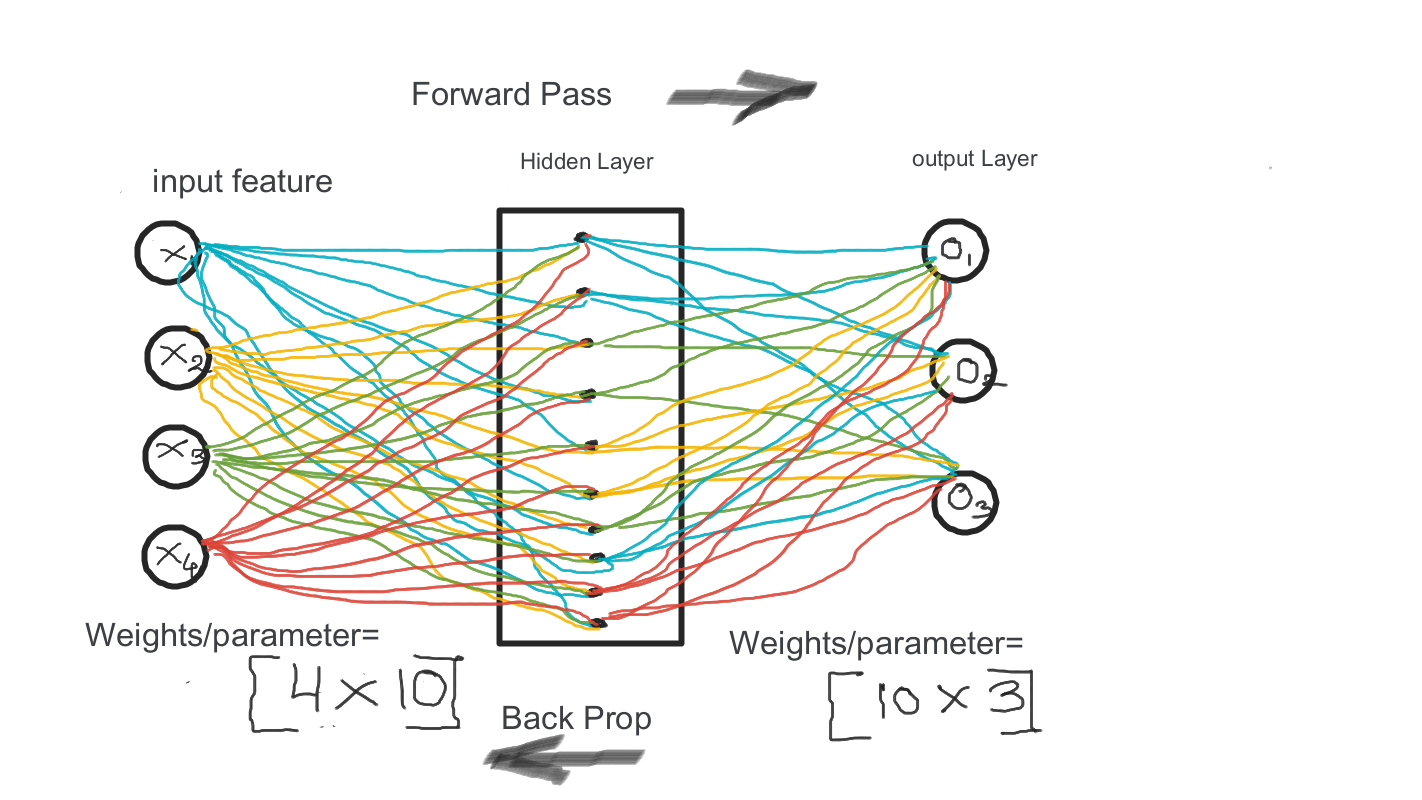

Let us understand the operation of Neural network at a high level. In NN, we feed our input vector as shown in the example x1,X2,X3,X4 and then each line here in this example  blue,yellow,green are nothing but weights and we can call them wights as w1,w2,w3...w10. Then we do a multiply the weight and input variable.The result is passed thought the activation function. 
We can divide out network into 2 parts:
1. First -inputs ->weights*inputs->activation function: Output of the activation function
2. Second-Output of the activation function act as input->output layer weights*output of the first hidden layer->Activation 

So the first operation will have [4X10] parameters and the second will have [10X3] parameters.



Activation for the first hidden layer is varies as sigmoid,tanh,Relu respectively.Activation function for the ouput layer is kept as softmax as this is a multiclass classification problem

# NN Implementation using Sigmoid activation


This implemention is divided into 2 parts:
1. Forward pass 
2. Backward progagation

## Forward pass
We will initialize the weights(wh) of size(4X10) and multiply and 10 biases(bh) and then perform the multiplication or dot product(zh). The resultant is passed throught the activation function which is signmoid in this case. The resultant is ah. Again weights are initialised of size [10x3] and biases is added to the 3 units of the ouput.The resulting dot product(zo) is again passed through the softmax(ao).
## Backward Propagation:
Due to the number parameter are lot, we are not defining all the parameters in this description.We are giving a high level initution which is demonstated by the code. 

As now we have propoagated through the network and generated the output. Then we will calculate the loss between the generated o/p and given o/p(y). We can use any loss function to do that. We are using cross entropy as this is multi-class calssification problem.
We have to back_prapagate the loss and adjust the weights so that the loss is minimum. 


In [305]:
# Defining Sigmoid Activation function

def sigmoid(x):
    return 1/(1+np.exp(-x))


In this model, we are going to use sigmoid activation unit and its nothing but 1/1+np.exp(-x)

In [306]:
# Defining the function for the derivative of sigmoid function
def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

We are implementing sigmoid and derivative of sigmoid is sigmoid(x) *(1-sigmoid (x). 

In [307]:
#Defining softmax function.
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

Softmax function takes an N-dimensional vector of real numbers and transforms it into a vector of real number in range (0,1) which add upto 1. 
pi=e**ai/∑N to k=1 of e*a with subcript k

In [308]:
# checking the instances 
instance = feature_set.shape[0]

print(instance)

150


In [309]:
# Attributes meaning features only
attributes = feature_set.shape[1]

print(attributes)

4


In [310]:
# As per the problem statement creating the hidden_nodes as 10 and output unit as 3
hidden_nodes = 10
output_labels = 3

In [311]:
# Innitiasing the weights randomly and learning rate 10e-4 

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4


In [312]:
import time

start_time=time.time() # Starting the timer 
error_cost_sigmoid = []

for epoch in range(50000):
    
    # Feed_Forward 
    #Phase-1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)
    
    #Phase-2
    
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    # Back Propagation
    
    dcost_dzo = ao - Y
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo
    
    #phase 2:
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh
    
    
    # Updaing weights:
    
    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-Y * np.log(ao))
        print('Loss function value: ', loss)
        error_cost_sigmoid.append(loss)
        
end_time=time.time()
execution_time_sigmoid=end_time-start_time
print(f"The execution time is {execution_time_sigmoid}")
    
    
                

Loss function value:  172.3043920894691
Loss function value:  46.3549254782957
Loss function value:  27.542735055947603
Loss function value:  18.717970978574726
Loss function value:  14.462165281122402
Loss function value:  12.197098910116166
Loss function value:  10.83170539658299
Loss function value:  9.923906545691644
Loss function value:  9.275908468548181
Loss function value:  8.788947951777168
Loss function value:  8.408852743219782
Loss function value:  8.103555391910717
Loss function value:  7.85286310472021
Loss function value:  7.6433981195822085
Loss function value:  7.46591523025272
Loss function value:  7.313794816794229
Loss function value:  7.182153687439769
Loss function value:  7.0672977439535405
Loss function value:  6.966372292307583
Loss function value:  6.877131121072195
Loss function value:  6.797779435144793
Loss function value:  6.726864155268499
Loss function value:  6.663195458798535
Loss function value:  6.605789461017484
Loss function value:  6.5538255409745

Loss function value:  5.283776752198389
Loss function value:  5.279075527080454
Loss function value:  5.274341208623357
Loss function value:  5.2695734595087425
Loss function value:  5.26477197858485
Loss function value:  5.259936502014344
Loss function value:  5.255066804184121
Loss function value:  5.250162698353532
Loss function value:  5.245224037020111
Loss function value:  5.240250711985788
Loss function value:  5.235242654109983
Loss function value:  5.230199832741455
Loss function value:  5.225122254825233
Loss function value:  5.2200099636865716
Loss function value:  5.214863037499651
Loss function value:  5.209681587453826
Loss function value:  5.204465755636177
Loss function value:  5.199215712653803
Loss function value:  5.193931655024168
Loss function value:  5.188613802365666
Loss function value:  5.183262394423847
Loss function value:  5.177877687971306
Loss function value:  5.172459953620497
Loss function value:  5.1670094725895686
Loss function value:  5.16152653346090

In [313]:
import matplotlib.pyplot as plt 

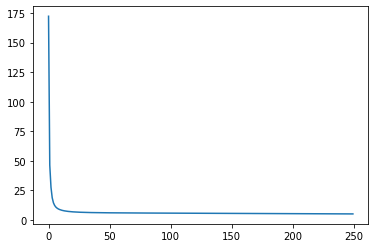

In [314]:
#Ploting the error
plt.plot(error_cost_sigmoid)

# Implementation of NN using tanh activation 

In [315]:
def tanh(x):
    ex=np.exp(x)
    enx=np.exp(-x)
    val= ((ex-enx)/(ex+enx))
    return val
    

In [316]:
def tanh_der(x):
    a=tanh(x)
    
    return 1-a**2

In [317]:
instance = feature_set.shape[0]

print(instance)

150


In [206]:
attributes = feature_set.shape[1]

print(attributes)

4


In [318]:
hidden_nodes = 10
output_labels = 3

In [319]:
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

In [320]:
start_time=time.time()

error_cost_tanh = []

for epoch in range(50000):
    
    # Feed_Forward 
    #Phase-1
    zh = np.dot(feature_set, wh) + bh
    ah = tanh(zh)
    
    #Phase-2
    
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    # Back Propagation
    
    dcost_dzo = ao - Y
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo
    
    #phase 2:
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh
    
    
    # Updaing weights:
    
    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-Y * np.log(ao))
        print('Loss function value: ', loss)
        error_cost_tanh.append(loss)
        
end_time=time.time()
execution_time_tanh=end_time-start_time
print(f"The execution time is {execution_time_tanh}")
    
    
    

Loss function value:  179.06863965266467
Loss function value:  16.828710492872133
Loss function value:  9.977167823316304
Loss function value:  8.188847449870424
Loss function value:  7.373406391603709
Loss function value:  6.923288707084616
Loss function value:  6.6476041963485
Loss function value:  6.465971103196456
Loss function value:  6.33927045525192
Loss function value:  6.246630793160143
Loss function value:  6.1761285883915695
Loss function value:  6.120567740471898
Loss function value:  6.07540204426456
Loss function value:  6.037645879544062
Loss function value:  6.005272464887423
Loss function value:  5.976866195359045
Loss function value:  5.9514136112505565
Loss function value:  5.92817303308611
Loss function value:  5.906590381683559
Loss function value:  5.8862429537322205
Loss function value:  5.866800635673988
Loss function value:  5.84799839333497
Loss function value:  5.829616444147391
Loss function value:  5.811466096146292
Loss function value:  5.793380210262456
L

Loss function value:  0.25374805559671654
Loss function value:  0.25151860386883357
Loss function value:  0.2493239757191964
Loss function value:  0.2471634170155499
Loss function value:  0.2450361940365291
Loss function value:  0.24294159281847444
Loss function value:  0.24087891852615936
Loss function value:  0.23884749484648296
Loss function value:  0.23684666340413518
Loss function value:  0.23487578319835184
Loss function value:  0.23293423005996358
Loss function value:  0.23102139612782568
Loss function value:  0.22913668934394354
Loss function value:  0.2272795329664466
Loss function value:  0.22544936509982993
Loss function value:  0.2236456382416423
Loss function value:  0.22186781884507134
Loss function value:  0.22011538689675675
Loss function value:  0.21838783550924146
Loss function value:  0.21668467052752471
Loss function value:  0.2150054101490922
Loss function value:  0.21334958455701175
Loss function value:  0.21171673556548076
Loss function value:  0.2101064162774465

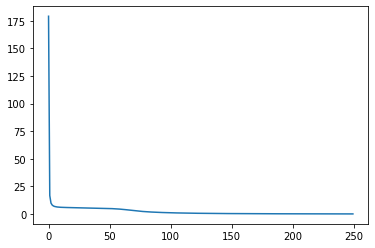

In [321]:
plt.plot(error_cost_tanh)

# Implementation of NN using Relu:



In [322]:
def relu(z):
    return np.maximum(0,z)




In [323]:
def der_relu(z):
    z[z>0]=1
    z[z<=0]=0
    return z

In [324]:
instance = feature_set.shape[0]

print(instance)

150


In [325]:
attributes = feature_set.shape[1]

print(attributes)

4


In [326]:
hidden_nodes = 10
output_labels = 3

In [327]:
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

In [328]:
start_time=time.time()
error_cost_relu = []

for epoch in range(50000):
    
    # Feed_Forward 
    #Phase-1
    zh = np.dot(feature_set, wh) + bh
    ah = relu(zh)
    
    #Phase-2
    
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    # Back Propagation
    
    dcost_dzo = ao - Y
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo
    
    #phase 2:
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = der_relu(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh
    
    
    # Updaing weights:
    
    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-Y * np.log(ao))
        print('Loss function value: ', loss)
        error_cost_relu.append(loss)
end_time=time.time()
execution_time_relu=end_time-start_time
print(f"The execution time is {execution_time_relu}")
    

Loss function value:  155.14867502099736
Loss function value:  13.36904467765188
Loss function value:  8.719071906867665
Loss function value:  7.425917102365917
Loss function value:  6.81718641246529
Loss function value:  6.468553288554328
Loss function value:  6.24215543559225
Loss function value:  6.082453226360852
Loss function value:  5.96368048914839
Loss function value:  5.873804663393232
Loss function value:  5.800143396391593
Loss function value:  5.7378766331362945
Loss function value:  5.683860582407191
Loss function value:  5.63602348254633
Loss function value:  5.592859053732736
Loss function value:  5.553336747753068
Loss function value:  5.517155102579105
Loss function value:  5.48383369794317
Loss function value:  5.452750803346468
Loss function value:  5.423540262562465
Loss function value:  5.396470272127144
Loss function value:  5.3711860446700355
Loss function value:  5.3475985154758545
Loss function value:  5.325887250756561
Loss function value:  5.3061058520981295


Loss function value:  4.92737370331304
Loss function value:  4.92706549121426
Loss function value:  4.926774394468807
Loss function value:  4.9264854217427025
Loss function value:  4.926124657840363
Loss function value:  4.925884485449167
Loss function value:  4.925526912388681
Loss function value:  4.92503596820847
Loss function value:  4.9246298010355485
Loss function value:  4.924202711385229
Loss function value:  4.923777535594318
Loss function value:  4.923384572208162
Loss function value:  4.922812821908974
Loss function value:  4.922388566643144
Loss function value:  4.921994084164673
Loss function value:  4.921573020947958
Loss function value:  4.9211527580830685
Loss function value:  4.920716065512008
Loss function value:  4.920341567511681
Loss function value:  4.919886804078424
Loss function value:  4.9195322778085515
Loss function value:  4.91912173915434
Loss function value:  4.918664521289413
Loss function value:  4.918287569385508
Loss function value:  4.917950878209147


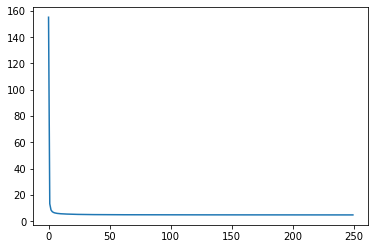

In [329]:
plt.plot(error_cost_relu)

## Comparing Training errors of 3 activation functions:

In [218]:
error_sigmoid = error_cost_sigmoid
error_tanh = error_cost_tanh
error_relu =error_cost_relu

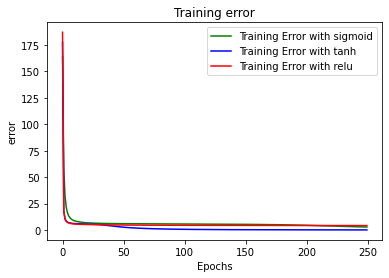

In [221]:
plt.plot(error_sigmoid,'g',label='Training Error with sigmoid')
plt.plot(error_tanh,'b',label='Training Error with tanh')
plt.plot(error_relu,'r',label='Training Error with relu')
plt.title('Training error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.legend()
plt.show()


The performance of the relu and sigmoid are yeilding similar results and tanh is yeilding better result than the former.

/home/jyodeep/anaconda3/envs/tf_cpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


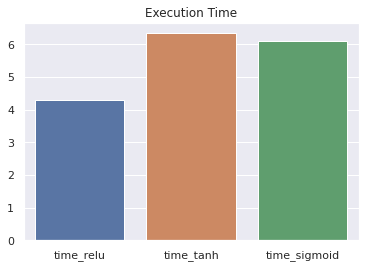

In [336]:
import seaborn as sns

activation_func=['time_relu','time_tanh','time_sigmoid']
time_taken=[4.295523166656494,6.339172124862671,6.092986583709717]
sns.set_theme(style="darkgrid")
sns.barplot(activation_func,time_taken)
plt.title("Execution Time")
plt.show()